## Correlation - Heatmap
This part is to look at the heatmap to check correlatin of variables.

In [6]:
# import libraries
import pandas as pd
import numpy as np

import warnings
warnings.filterwarnings(action='ignore')

# read data
df = pd.read_csv('data/train.csv')

# drop irrelevant columns
df.drop(columns = ["Name", "PassengerId", "Cabin", "Ticket"], inplace=True)

# handling missing values
df.Age.fillna(df.Age.mean(), inplace=True)
df.Embarked.fillna('N/A', inplace=True)

# separating target and features
X = df.drop(columns = ["Survived"])
y = df.Survived

X_labeled = X.copy()

# labeling library
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

# The gender and embarked columns are labeled as numeric values
col = ["Sex", "Embarked"]
for c in col:
    X_labeled[c] = le.fit_transform(X[c].astype('str'))

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

def heat_map(y_train, X_train):

    heatmap_data = pd.concat([y_train, X_train], axis=1)
    corr = heatmap_data.corr()

    fig, ax = plt.subplots(figsize=(10, 16))
    sns.heatmap(data=corr,
                mask=np.triu(np.ones_like(corr, dtype=bool)),
                ax=ax,
                annot=True,
                cbar_kws={"label": "Correlation", 
                          "orientation": "horizontal", 
                          "pad": .2, 
                          "extend": "both"}
               )
    ax.set_title("Heatmap of Correlation")
    
    plt.show() 
    
    pass

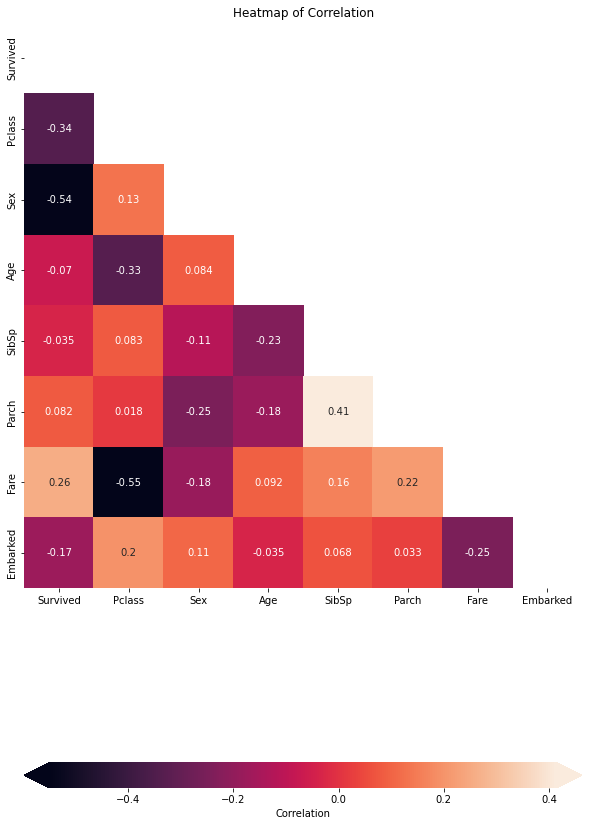

In [10]:
heat_map(y, X_labeled)

Survived column has good correlation coefficient with sex, pclass, and fare. We will look into this more precisely with machine learning skills.